# Python

In [25]:
def foo(choice):
    if choice:        
        return "Oi, Mundo"
    else:
        return 3.1415

In [26]:
foo(0)

3.1415

In [27]:
foo(1)

'Oi, Mundo'

In [28]:
a = foo(True)
print(a)

a = foo(False)
print(a)

Oi, Mundo
3.1415


In [29]:
# List
a = ['spam', 'eggs', 100, 1234]

In [30]:
# Acessando uma posição específica (similar a um Array)
x = a[0]
print(x)

x = a[3]
print(x)

spam
1234


In [31]:
# Índice reverso a partir do final (-1) do vetor 
a[-2]

100

In [32]:
# Slicing - Intervalo semi-aberto: [first, last)
a[1:-1]

['eggs', 100]

In [33]:
a.insert(0, True)
a.append(999)

print(a)

[True, 'spam', 'eggs', 100, 1234, 999]


In [34]:
# Dictionary (coleção de Chave/Valor)
tel = {'jack': 4098, 'sape': 4139}
tel

{'jack': 4098, 'sape': 4139}

In [35]:
tel.keys()

dict_keys(['jack', 'sape'])

In [36]:
tel.values()

dict_values([4098, 4139])

In [37]:
print('guido' in tel)

tel['guido'] = 9999

print('guido' in tel)
      
print(tel)

print(tel['guido'])

False
True
{'jack': 4098, 'sape': 4139, 'guido': 9999}
9999


In [38]:
a = ['cat', 'window', 'defenestrate']
for x in a:
    print(x, len(x))

cat 3
window 6
defenestrate 12


In [39]:
list(range(1, 5))

[1, 2, 3, 4]

In [40]:
list(range(1, 10, 2))

[1, 3, 5, 7, 9]

In [41]:
list(range(5, 1, -1))

[5, 4, 3, 2]

In [42]:
def somatorio(*args):
    soma = 0
    for n in args:
        soma += n
    return soma

print(somatorio(1, 2, 3))

6


In [43]:
def print_info(**kwargs):  
    for key, value in kwargs.items(): 
        print("%s: %s" % (key, value)) 
  
print_info(Nome="João", Sobrenome="Silva", Idade=18) 

Nome: João
Sobrenome: Silva
Idade: 18


# CoppeliaSim

## Configuração

### Cliente (seu programa)

- Colocar os seguintes arquivos na mesma pasta do seu script
    - sim.py        : programming\remoteApiBindings\python\python
    - simConst.py   : programming\remoteApiBindings\python\python
    - remoteApi.dll : programming\remoteApiBindings\lib\lib\Windows (de acordo com sua plataforma)
    
### Servidor (CoppeliaSim)

- Adicionar o seguinte comando em algum child-script (por exemplo, no mainScript ou de um robô)

```python
simRemoteApi.start(19999)
```

- Esse comando deve ser executado uma única vez, durante a inicialização!
- Você também pode usar a porta 19997 do 'continuous remote API server services' (remoteApiConnections.txt)
- Finalmente, a simulação deve ser iniciada e o script executado

### Remote API functions (Python)

https://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm

In [44]:
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

import time

In [45]:
####################################################################################
#                                                                                  #
#                 LEMBRE-SE QUE A SIMULAÇÃO DEVE ESTAR EM EXECUÇÃO!                #
#                                                                                  #
####################################################################################

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim
#clientID=sim.simxStart('127.0.0.1',19997,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')

    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

Program started
Connected to remote API server
Program ended


## Exemplo 1 (simpleTest.py)

In [46]:
####################################################################################
#                                                                                  #
#                 LEMBRE-SE QUE A SIMULAÇÃO DEVE ESTAR EM EXECUÇÃO!                #
#                                                                                  #
####################################################################################

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res,objs=sim.simxGetObjects(clientID,sim.sim_handle_all,sim.simx_opmode_blocking)
    if res==sim.simx_return_ok:
        print ('Number of objects in the scene: ',len(objs))
    else:
        print ('Remote API function call returned with error code: ',res)

    time.sleep(2)

    # Now retrieve streaming data (i.e. in a non-blocking fashion):
    startTime=time.time()
    sim.simxGetIntegerParameter(clientID,sim.sim_intparam_mouse_x,sim.simx_opmode_streaming) # Initialize streaming
    while time.time()-startTime < 5:
        returnCode,data=sim.simxGetIntegerParameter(clientID,sim.sim_intparam_mouse_x,sim.simx_opmode_buffer) # Try to retrieve the streamed data
        if returnCode==sim.simx_return_ok: # After initialization of streaming, it will take a few ms before the first value arrives, so check the return code
            print ('Mouse position x: ',data) # Mouse position x is actualized when the cursor is over CoppeliaSim's window
        time.sleep(0.005)

    # Now send some data to CoppeliaSim in a non-blocking fashion:
    sim.simxAddStatusbarMessage(clientID,'Hello CoppeliaSim!',sim.simx_opmode_oneshot)

    # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive. You can guarantee this with (for example):
    sim.simxGetPingTime(clientID)

    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

Program started
Connected to remote API server
Number of objects in the scene:  84
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  8

Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse position x:  817
Mouse posit

## Exemplo 2 (Pioneer)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

import math

'''
readSensorData - It will try to capture the range and angle data from the simulator.
                 The request for the range data is sent in streaming mode to force
                 it to sync with the angle data request which acts as a mutex.

inputs:
    -clientId: simulator client id obtained through a successfull connection with the simulator.
    -range_data_signal_id: string containing the range data signal pipe name.
    -angle_data_signal_id: string containing the angle data signal pipe name.
outputs:
    -returns None if no data is recovered.
    -returns two arrays, one with data range and the other with their angles, if data was 
    retrieved successfully.
'''
def readSensorData(clientId=-1, 
                    range_data_signal_id="hokuyo_range_data", 
                    angle_data_signal_id="hokuyo_angle_data"):

    # the first call should be non-blocking to avoid getting out-of-sync angle data
    returnCodeRanges, string_range_data = sim.simxGetStringSignal(clientId, range_data_signal_id, sim.simx_opmode_streaming)

    # the second call should block to avoid out-of-sync scenarios
    # between your python script and the simulator's main loop
    # (your script may be slower than the simulator's main loop, thus
    # slowing down data processing)
    returnCodeAngles, string_angle_data = sim.simxGetStringSignal(clientId, angle_data_signal_id, sim.simx_opmode_blocking)

    # check the if both data were obtained correctly
    if returnCodeRanges == 0 and returnCodeAngles == 0:
        # unpack data from range and sensor messages
        raw_range_data = sim.simxUnpackFloats(string_range_data)
        raw_angle_data = sim.simxUnpackFloats(string_angle_data)

        return raw_range_data, raw_angle_data

    # return none in case were nothing was gotten from the simulator
    return None


def draw_ultrassonic_data(ultrassonic_data, max_sensor_range=5, ang_robot):
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(ultrassonic_data)):
        dist = ultrassonic_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang_robot[i])
            y = dist * np.sin(ang_robot[i])
            c = 'r'
            if ang_robot[i] < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

Program started
Connected to remote API server


[[-1.57079637  2.13169503]
 [-1.56785512  2.12833738]
 [-1.5648967   2.12210536]
 ...
 [ 1.5648967   4.2074337 ]
 [ 1.56785512  4.20175123]
 [ 1.57079637  4.2140913 ]]
Pos:  [-0.7450087666511536, -2.3774166107177734, 0.13864457607269287]
Program ended


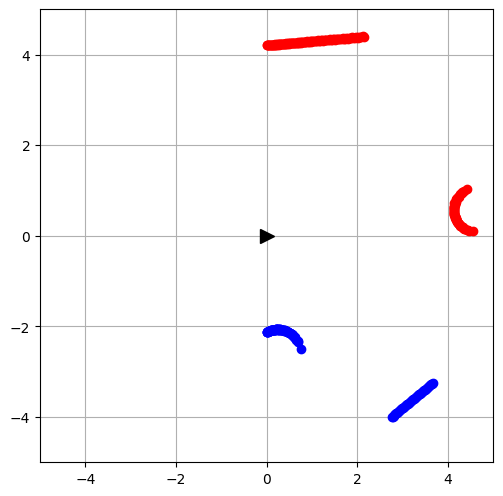

In [48]:
####################################################################################
#                                                                                  #
#                 LEMBRE-SE QUE A SIMULAÇÃO DEVE ESTAR EM EXECUÇÃO!                #
#                                                                                  #
####################################################################################

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    # Iniciando a simulação
    # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
    # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)     
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)    
    
    # Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_range_data, sim.simx_opmode_streaming + 10)
    
    # Prosseguindo com as leituras
    raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T
    
    print(laser_data)
    draw_laser_data(laser_data)
    
    returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
    print('Pos: ', pos)
    
    #raise SystemExit()
    
    # Dados do Pioneer
    L = 0.381   # Metros
    r = 0.0975  # Metros

    t = 0
    # Lembrar de habilitar o 'Real-time mode'
    startTime=time.time()
    lastTime = startTime
    while t < 5:
        
        now = time.time()
        dt = now - lastTime
    
        # Fazendo leitura do laser   
        raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
        laser_data = np.array([raw_angle_data, raw_range_data]).T
        
        # Velocidade básica (linear, angular)
        v = 0
        w = np.deg2rad(0)      

        frente = int(len(laser_data)/2)
        lado_direito = int(len(laser_data)*1/4)
        lado_esquerdo = int(len(laser_data)*3/4)
        
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 2:
            v = 0
            w = np.deg2rad(-30)
        elif laser_data[lado_esquerdo, 1] > 2:
            v = 0
            w = np.deg2rad(30)
        
        # Isso é o modelo cinemático, estudaremos detalhadamente depois!
        wl = v/r - (w*L)/(2*r)
        wr = v/r + (w*L)/(2*r)
        
        # Enviando velocidades
        sim.simxSetJointTargetVelocity(clientID, l_wheel, wl, sim.simx_opmode_streaming + 5)
        sim.simxSetJointTargetVelocity(clientID, r_wheel, wr, sim.simx_opmode_streaming + 5)        
    
        t = t + dt  
        lastTime = now

    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
       
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

# Para praticar

- Adicione novos elementos no mapa
- Envie diferentes comandos de velocidade para o robô
- Altere a estratégia de navegação para obter outros comportamentos
- Altere a estratégia de navegação para utilizar os sensores ultrassônicos